# The purpose of this notebook is to test the functions in the various files. It's like a unittest code but I don't know how to do that so I'm doing this instead. 

In [1]:
import sys
import importlib
sys.path.append('.')

%load_ext autoreload
%autoreload 1

## Agents.py testing 

In [2]:
%aimport agents

In [3]:
importlib.reload(agents)

<module 'agents' from '/Users/lucas.spangher/Documents/Berkeley Files/Research/Deferable Loads/transactive_control/agents.py'>

In [4]:
bobs_energy = [500,560,570,580,480,640]
bobs_points = [1,1,1,3,3,3]

Bob = agents.Person(bobs_energy)
Bob_energy_output = Bob.energy_output_simple_linear(bobs_points)
Bob_energy_output

,0
0,500.076737
1,558.639654
2,569.520228
3,579.161296
4,479.603782
5,638.499831


## Rewards testing

In [29]:
%aimport reward
import osqp
import cvxopt
import numpy as np
import pandas as pd

In [23]:
prices = [1,1,.5,.5,.3,.3]

bobs_reward = reward.Reward(Bob_energy_output, prices, 100, 600)

In [25]:
bobs_ideal_demands= bobs_reward.ideal_use_calculation()

The problem is QP:  True
-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 6, constraints m = 13
          nnz(P) + nnz(A) = 18
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -4.1657e+00   3.33e+03   3.33e+05   1.00e-01   5.37e-05s
 200   1.8855e+03   1.18e-02   1.46e-05   2.99e-04   1.78e-04s
plsh   1.8855e+03   0.00

In [27]:
bobs_reward.neg_distance_from_ideal(bobs_ideal_demands)

-249565.957312918

## Testing the simulation environment

In [127]:
baseline_energy1 = pd.read_csv("wg1.txt", sep = "\t")
baseline_energy1["net_energy_use"] = baseline_energy1["TOTAL_ENERGY_DESK_TODAY"].diff()
baseline_energy1.net_energy_use.loc[baseline_energy1.net_energy_use<0] = 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [65]:
baseline_energy1.head()

,Id,TimeStamp,WG_1_DSK_3,TOTAL_ENERGY_DESK_TODAY,net_energy_use
0,1,7/30/2018 12:00:00 AM,DESK-3,383.3700,NaN
1,2,7/30/2018 12:15:00 AM,DESK-3,387.7375,4.3675
2,3,7/30/2018 12:30:00 AM,DESK-3,392.1050,4.3675
3,4,7/30/2018 12:45:00 AM,DESK-3,396.4725,4.3675
4,5,7/30/2018 1:00:00 AM,DESK-3,400.8400,4.3675


In [93]:
from datetime import datetime

baseline_energy1["TimeStamp"] = pd.to_datetime(baseline_energy1.TimeStamp)
baseline_energy1.TimeStamp[1:5]

1   2018-07-30 00:15:00
2   2018-07-30 00:30:00
3   2018-07-30 00:45:00
4   2018-07-30 01:00:00
Name: TimeStamp, dtype: datetime64[ns]

In [114]:
temp_df = baseline_energy1
temp_df["month"] = [str(t.month) if t.month>9 else \
    "0" + str(t.month) for t in baseline_energy1["TimeStamp"]]
temp_df["year"] = [str(t.year) for t in baseline_energy1["TimeStamp"]]
temp_df["hour"] = [str(t.hour) if t.hour>9 else \
    "0" + str(t.hour) for t in baseline_energy1["TimeStamp"]]
temp_df["day"] = [str(t.day) if t.day>9 else \
    "0" + str(t.day) for t in baseline_energy1["TimeStamp"]]
baseline_energy1["date_hour"] =  (temp_df[['year', 'month',"day", "hour"]]
                                  .apply(lambda x: ''.join(x), axis=1))

In [117]:
b_grouped = baseline_energy1.groupby("date_hour")
# for name, group in b_grouped:
#     print(name)
#     print(group)

final = b_grouped.agg({"Id":"first",
              "TimeStamp": "first",
              "WG_1_DSK_3": "first",
              "TOTAL_ENERGY_DESK_TODAY":"first",
              "net_energy_use":"sum"})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11756a080>]],
      dtype=object)

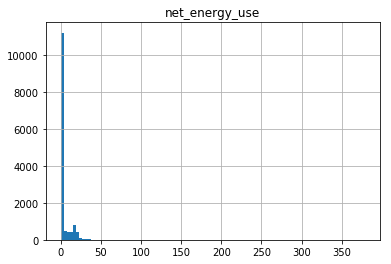

In [62]:
%matplotlib inline

baseline_energy1.hist("net_energy_use", bins =100)

In [132]:
%aimport utils

In [133]:
baseline_energy1 = pd.read_csv("wg1.txt", sep = "\t")
baseline_energy2 = pd.read_csv("wg2.txt", sep = "\t")
baseline_energy3 = pd.read_csv("wg3.txt", sep = "\t")

be1 = utils.change_wg_into_diff(baseline_energy1)
be2 = utils.change_wg_into_diff(baseline_energy2)
be3 = utils.change_wg_into_diff(baseline_energy3)

   Id              TimeStamp WG_1_DSK_3  TOTAL_ENERGY_DESK_TODAY
0   1  7/30/2018 12:00:00 AM     DESK-3                 383.3700
1   2  7/30/2018 12:15:00 AM     DESK-3                 387.7375
2   3  7/30/2018 12:30:00 AM     DESK-3                 392.1050
3   4  7/30/2018 12:45:00 AM     DESK-3                 396.4725
4   5   7/30/2018 1:00:00 AM     DESK-3                 400.8400


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


   Id              TimeStamp WG_2_DESK-1  TOTAL_ENERGY_DESK_TODAY
0   1  7/30/2018 12:00:00 AM      DESK-1                 215.1500
1   2  7/30/2018 12:15:00 AM      DESK-1                 219.2925
2   3  7/30/2018 12:30:00 AM      DESK-1                 223.4350
3   4  7/30/2018 12:45:00 AM      DESK-1                 227.5775
4   5   7/30/2018 1:00:00 AM      DESK-1                 231.7200
   Id              TimeStamp WG3_DESK-1  TOTAL_ENERGY_DESK_TODAY
0   1  7/30/2018 12:00:00 AM     DESK-1                  1133.82
1   2  7/30/2018 12:15:00 AM     DESK-1                  1162.90
2   3  7/30/2018 12:30:00 AM     DESK-1                  1191.98
3   4  7/30/2018 12:45:00 AM     DESK-1                  1221.06
4   5   7/30/2018 1:00:00 AM     DESK-1                  1250.14


In [134]:
be2.head()

,Id,TimeStamp,TOTAL_ENERGY_DESK_TODAY,net_energy_use
date_hour,,,,
2018073000,1,2018-07-30 00:00:00,215.15,234.325
2018073001,5,2018-07-30 01:00:00,231.72,51.140
2018073002,9,2018-07-30 02:00:00,260.29,25.010
2018073003,13,2018-07-30 03:00:00,267.44,4.295
2018073004,17,2018-07-30 04:00:00,267.92,0.840
